In [1]:
import pandas as pd
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt


In [44]:


df_temp_out = pd.read_csv('outdoor_temperature.csv')  
df_temp_in = pd.read_csv('indoor_temperature.csv')  
df_heat = pd.read_csv('heating_consumption.csv')  

num_columns = df_temp_out.shape[1]
new_column_names = [f"Heure_{i+1}" for i in range(num_columns)] 
df_temp_out.columns = new_column_names
df_temp_in.columns = new_column_names
df_heat.columns = new_column_names


df_combined = pd.DataFrame()


for col in df_temp_out.columns:
    df_combined[col] = [
        list(zip(
            [df_temp_out[col][i]], 
            [df_temp_in[col][i]],
            [df_heat[col][i]]
        )) 
        for i in range(len(df_temp_out))
    ]

print(df_combined)


                   Heure_1                Heure_2                Heure_3  \
0    [(0.9, 18.5909, 0.0)]  [(1.4, 18.5636, 0.0)]  [(1.6, 18.4273, 0.0)]   
1    [(0.8, 17.9545, 0.0)]  [(0.9, 17.8727, 0.0)]  [(0.9, 17.6727, 0.0)]   
2    [(0.5, 18.0818, 0.0)]  [(0.2, 18.1364, 0.0)]  [(0.1, 18.0727, 0.0)]   
3    [(1.9, 19.3364, 0.0)]  [(1.7, 19.2727, 0.0)]  [(1.3, 19.2727, 0.0)]   
4    [(1.4, 19.2273, 0.0)]  [(1.5, 19.3091, 0.0)]  [(1.5, 19.3545, 0.0)]   
..                     ...                    ...                    ...   
722    [(7.1, 20.92, 0.0)]    [(7.2, 20.89, 0.0)]    [(7.6, 20.86, 0.0)]   
723    [(8.1, 21.38, 0.0)]    [(7.8, 21.35, 0.0)]    [(6.9, 21.34, 0.0)]   
724   [(10.9, 20.95, 0.0)]   [(11.0, 20.92, 0.0)]   [(10.7, 20.85, 0.0)]   
725    [(6.5, 20.34, 0.0)]    [(6.9, 20.22, 0.0)]    [(6.3, 20.15, 0.0)]   
726    [(9.3, 20.38, 0.0)]    [(8.9, 20.44, 0.0)]    [(8.7, 20.46, 0.0)]   

                   Heure_4                Heure_5                   Heure_6  \
0    [(0

In [34]:
def normalize_data(data):
    df_normalized = data.copy()
    for col in df_normalized.columns:
        df_normalized[col] = df_normalized[col].apply(lambda x: tuple(TimeSeriesScalerMeanVariance().fit_transform(np.array(x).reshape(1, -1)).flatten()))
    return df_normalized

df_normalized = normalize_data(df_combined)

print(df_normalized)

                                               Heure_1  \
0    (-0.6538824279523014, 1.412910056904622, -0.75...   
1    (-0.6582575322465462, 1.4131134366470381, -0.7...   
2    (-0.6771664645751243, 1.4137967852346593, -0.7...   
3    (-0.5951226782340111, 1.4085841779410702, -0.8...   
4    (-0.6256207123917408, 1.4111950989749378, -0.7...   
..                                                 ...   
722  (-0.2578806641418826, 1.3331509333763383, -1.0...   
723  (-0.19591539197901228, 1.3108933370642017, -1....   
724  (0.0331184611550311, 1.207849759771723, -1.240...   
725  (-0.2884512448216316, 1.343223916621712, -1.05...   
726  (-0.07122274933041932, 1.2588020752443805, -1....   

                                               Heure_2  \
0    (-0.6225488166136576, 1.4109674237432739, -0.7...   
1    (-0.6516647602357878, 1.4128005398172132, -0.7...   
2    (-0.695313392290496, 1.414148358033006, -0.718...   
3    (-0.6072956382076723, 1.4097192480181049, -0.8...   
4    (-0.6198

In [41]:
def median_of_vectors(data):
    df_median = data.copy()

    for col in df_median.columns:
        df_median[col] = df_median[col].apply(lambda x: np.median(np.array(x)))

    return df_median

df_median = median_of_vectors(df_normalized)

print(df_median)

      Heure_1   Heure_2   Heure_3   Heure_4   Heure_5   Heure_6   Heure_7  \
0   -0.653882 -0.622549 -0.608954 -0.659136 -0.683928 -0.644051 -0.638092   
1   -0.658258 -0.651665 -0.651014 -0.637457 -0.623610 -0.623519 -0.701026   
2   -0.677166 -0.695313 -0.701214 -0.671105 -0.689478 -0.649838 -0.633851   
3   -0.595123 -0.607296 -0.631911 -0.619778 -0.619516 -0.643369 -0.690327   
4   -0.625621 -0.619865 -0.620081 -0.619995 -0.626024 -0.629543 -0.690974   
..        ...       ...       ...       ...       ...       ...       ...   
722 -0.257881 -0.249680 -0.218873 -0.003099  0.076613 -0.168188 -0.228610   
723 -0.195915 -0.217288 -0.282669 -0.272599 -0.359232 -0.214306 -0.311057   
724  0.033118  0.042133  0.021536  0.040062  0.040886  0.020529  0.004692   
725 -0.288451 -0.254995 -0.299016 -0.334354 -0.398216 -0.404916 -0.464960   
726 -0.071223 -0.105165 -0.121663 -0.124336 -0.086329 -0.091415 -0.000396   

      Heure_8   Heure_9  Heure_10  ...  Heure_15  Heure_16  Heure_17  \
0  

In [36]:
def apply_kmeans_dtw(data_normalized, n_clusters=3):
    kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
    data_normalized['cluster'] = kmeans_dtw.fit_predict(data_normalized)
    return kmeans_dtw, data_normalized


In [37]:
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_median, 4)

df_heat_norm=df_heat.copy()
df_temp_in_norm=df_temp_in.copy()
df_temp_out_norm=df_temp_out.copy()

df_heat_norm["cluster"]=data_normalized_with_cluster["cluster"]
df_temp_in_norm["cluster"]=data_normalized_with_cluster["cluster"]
df_temp_out_norm["cluster"]=data_normalized_with_cluster["cluster"]

In [38]:
def compute_cluster_means(data_normalized, cluster_assignments, column_index):
    cluster_means = {}

    for cluster_id in np.unique(cluster_assignments):
        cluster_data = data_normalized[cluster_assignments == cluster_id].iloc[:, column_index:-1]
        cluster_means[cluster_id] = cluster_data.mean(axis=0)  

    return cluster_means


In [39]:
def plot_clusters_single_variable(data_normalized, cluster_assignments, column_index, y_label="Valeur", num_labels=10):
    cluster_means = compute_cluster_means(data_normalized, cluster_assignments, column_index)

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    for cluster_id, cluster_center in cluster_means.items():
        cluster_data = data_normalized[cluster_assignments == cluster_id].iloc[:, column_index:-1]

        for idx, row in cluster_data.iterrows():
            axes[cluster_id // 2, cluster_id % 2].plot(range(24), row, color='gray', alpha=0.5)
        
        axes[cluster_id // 2, cluster_id % 2].plot(range(24), cluster_center, color='red', linewidth=3, label=f"Centre du cluster {cluster_id}")
        
        axes[cluster_id // 2, cluster_id % 2].set_title(f"Séries temporelles du Cluster {cluster_id}")
        axes[cluster_id // 2, cluster_id % 2].set_xlabel("Heures")
        axes[cluster_id // 2, cluster_id % 2].set_ylabel(y_label)
        #axes[cluster_id // 2, cluster_id % 2].ylim([np.min(row),np.max(row)])
        axes[cluster_id // 2, cluster_id % 2].grid(True)

    axes[1, 1]

    plt.tight_layout()
    plt.show()


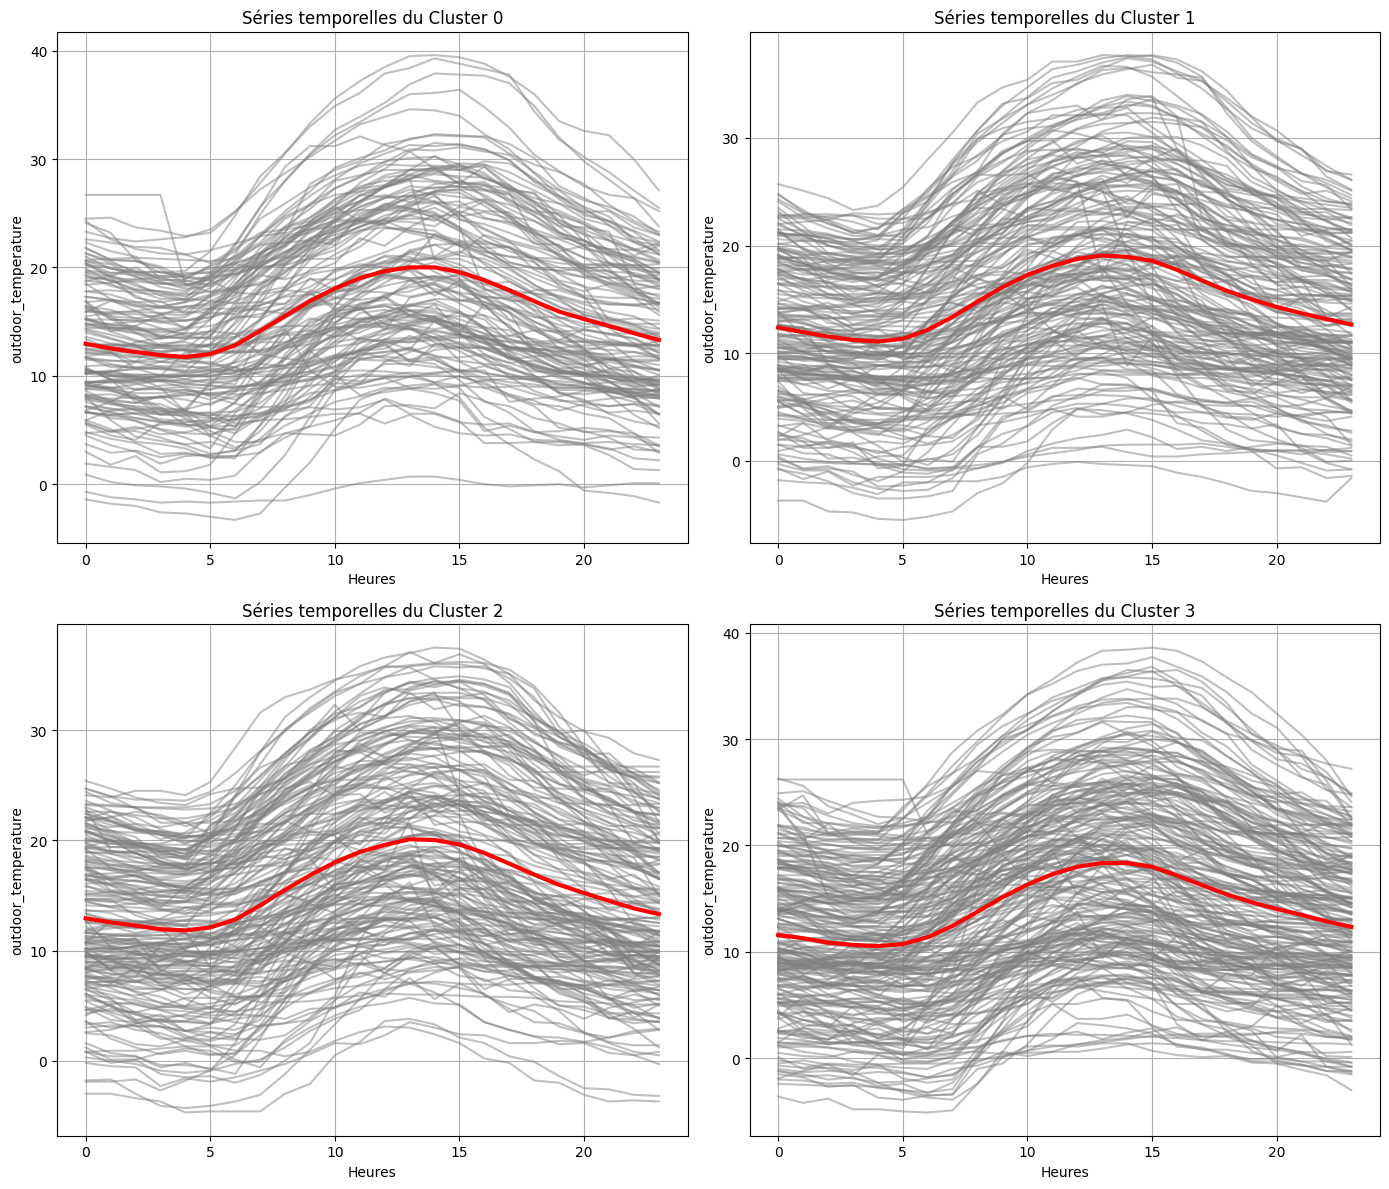

In [40]:
plot_clusters_single_variable(df_temp_out_norm, df_temp_out_norm["cluster"], column_index=0, y_label="outdoor_temperature")


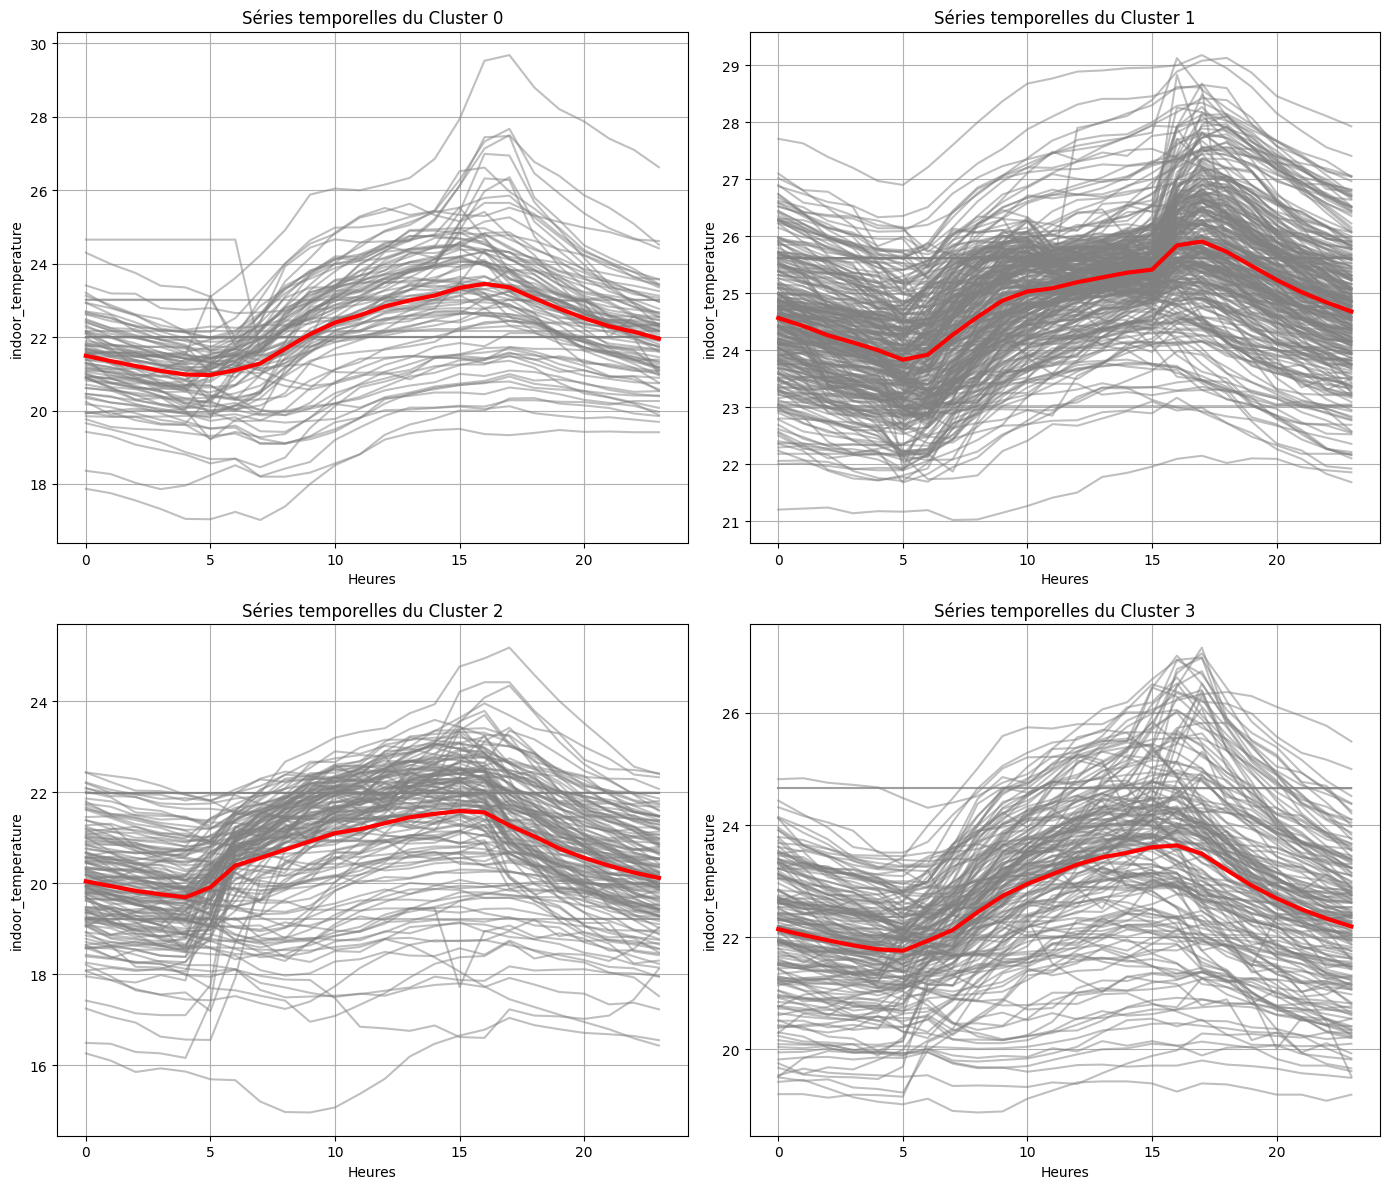

In [31]:
plot_clusters_single_variable(df_temp_in_norm, df_temp_in_norm["cluster"], column_index=0, y_label="indoor_temperature")


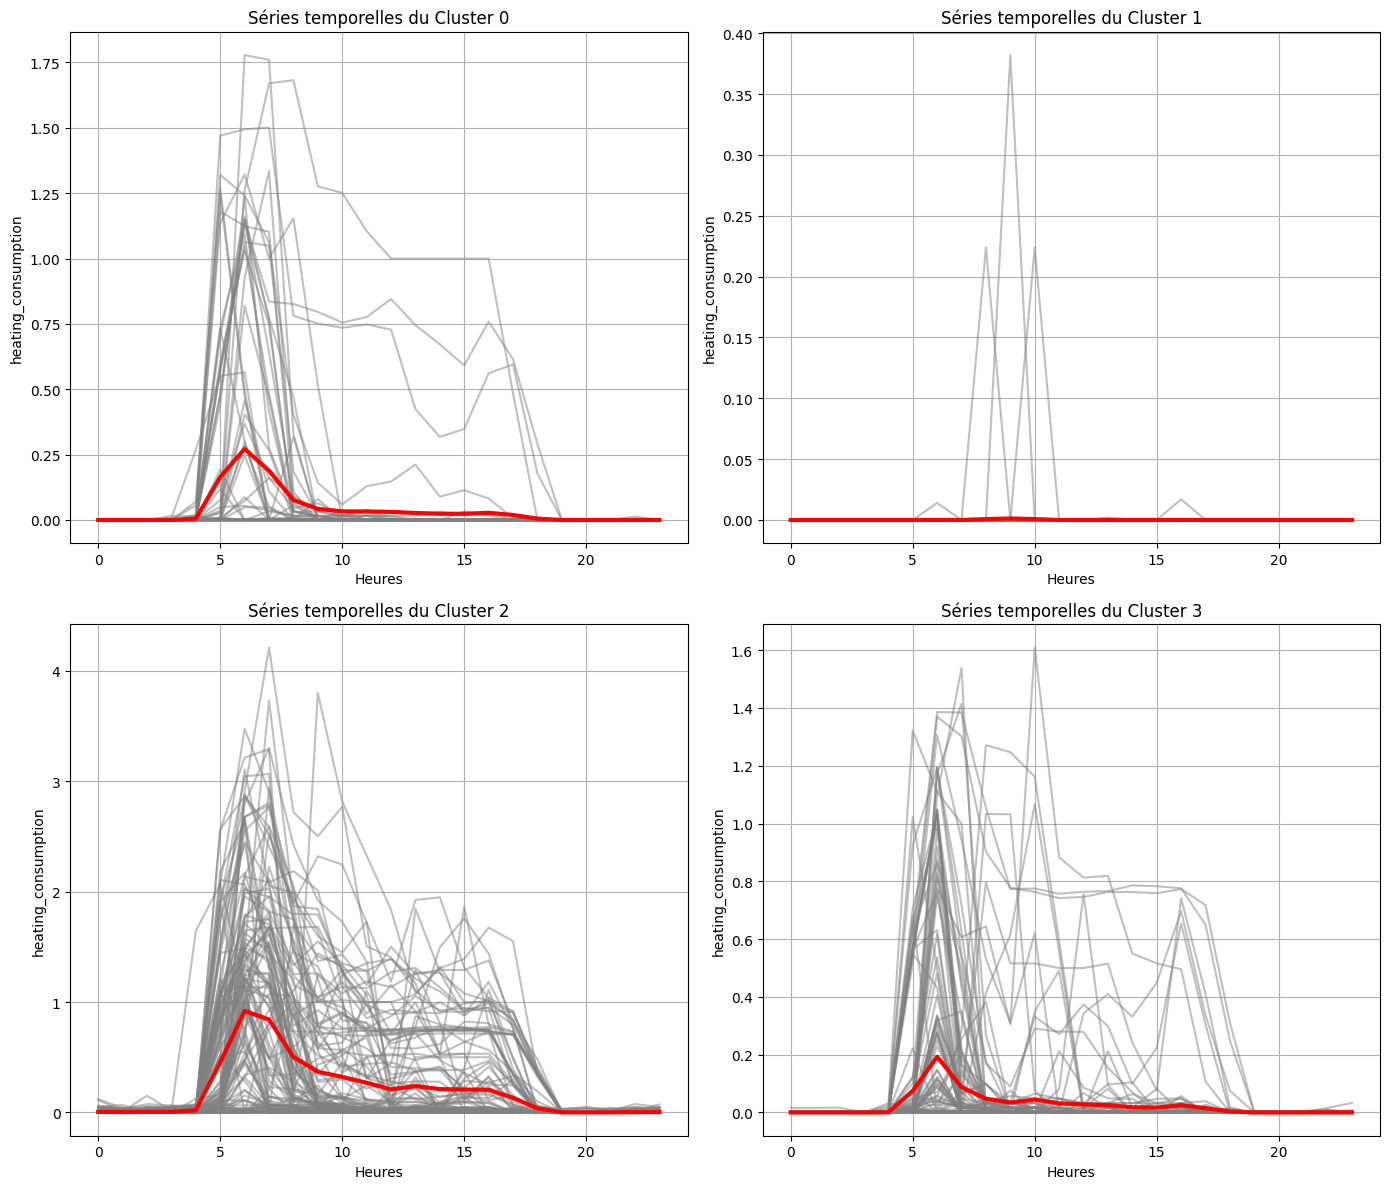

In [32]:
plot_clusters_single_variable(df_heat_norm, df_heat_norm["cluster"], column_index=0, y_label="heating_consumption")
